In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import calendar

In [27]:
def procesing(df):
    ''' Adds lags  and day_of_week and month columns to dataframe'''
    
    # Add Lags
    df_shifted = pd.concat([df]+[df['P'].shift(i) for i in range(24,49)]+[df['P'].shift(i) for i in range(168,193)], axis=1)
    df_shifted.columns = ['P']+['Ph-{}'.format(i) for i in range(24,49)] + ['Ph-{}'.format(i) for i in range(168,193)]
    
    # Add day_of_week column
    df_shifted['day_of_week'] = df.index.weekday_name
    
    # Add month abbreviature column
    df_shifted['month'] = df_shifted.index.month
    df_shifted['month'] = df_shifted['month'].apply(lambda x: calendar.month_abbr[x])
    
    # Add one-hot Encoding
    df = pd.get_dummies(df_shifted)
    
    return df.dropna()
    

In [12]:
prices = pd.read_excel("lbrprices.xlsx", index_col='Fecha_hora')
prices.head(10)

P     Ph-1     Ph-2     Ph-3  Ph-24  Ph-48  Ph-168  \
Fecha_hora                                                                      
2016-08-01 00:00:00  55.4450      NaN      NaN      NaN    NaN    NaN     NaN   
2016-08-01 01:00:00  40.1169  55.4450      NaN      NaN    NaN    NaN     NaN   
2016-08-01 02:00:00  34.0645  40.1169  55.4450      NaN    NaN    NaN     NaN   
2016-08-01 03:00:00  31.1261  34.0645  40.1169  55.4450    NaN    NaN     NaN   
2016-08-01 04:00:00  29.7240  31.1261  34.0645  40.1169    NaN    NaN     NaN   
2016-08-01 05:00:00  32.3707  29.7240  31.1261  34.0645    NaN    NaN     NaN   
2016-08-01 06:00:00  35.1250  32.3707  29.7240  31.1261    NaN    NaN     NaN   
2016-08-01 07:00:00  38.6416  35.1250  32.3707  29.7240    NaN    NaN     NaN   
2016-08-01 08:00:00  48.4632  38.6416  35.1250  32.3707    NaN    NaN     NaN   
2016-08-01 09:00:00  49.4265  48.4632  38.6416  35.1250    NaN    NaN     NaN   

                     lun  mmjv  sab  dom  
Fecha_hora                                
2016-08-01 00:00:00    1     0    0    0  
2016-08-01 01:00:00    1     0    0    0  
2016-08-01 02:00:00    1     0    0    0  
2016-08-01 03:00:00    1     0    0    0  
2016-08-01 04:00:00    1     0    0    0  
2016-08-01 05:00:00    1     0    0    0  
2016-08-01 06:00:00    1     0    0    0  
2016-08-01 07:00:00    1     0    0    0  
2016-08-01 08:00:00    1     0    0    0  
2016-08-01 09:00:00    1     0    0    0

In [28]:
df = procesing(prices[['P']])
df.head()

P    Ph-24    Ph-25    Ph-26    Ph-27    Ph-28  \
Fecha_hora                                                                  
2016-08-09 00:00:00  95.3264  54.8461  45.1982  44.7123  46.2995  42.9422   
2016-08-09 01:00:00  82.8532  52.2179  54.8461  45.1982  44.7123  46.2995   
2016-08-09 02:00:00  57.9764  61.9198  52.2179  54.8461  45.1982  44.7123   
2016-08-09 03:00:00  67.6407  36.8105  61.9198  52.2179  54.8461  45.1982   
2016-08-09 04:00:00  66.4892  34.8274  36.8105  61.9198  52.2179  54.8461   

                       Ph-29    Ph-30    Ph-31    Ph-32    ...      month_Dec  \
Fecha_hora                                                 ...                  
2016-08-09 00:00:00  44.3551  46.3440  45.6826  42.6676    ...              0   
2016-08-09 01:00:00  42.9422  44.3551  46.3440  45.6826    ...              0   
2016-08-09 02:00:00  46.2995  42.9422  44.3551  46.3440    ...              0   
2016-08-09 03:00:00  44.7123  46.2995  42.9422  44.3551    ...              0   
2016-08-09 04:00:00  45.1982  44.7123  46.2995  42.9422    ...              0   

                     month_Feb  month_Jan  month_Jul  month_Jun  month_Mar  \
Fecha_hora                                                                   
2016-08-09 00:00:00          0          0          0          0          0   
2016-08-09 01:00:00          0          0          0          0          0   
2016-08-09 02:00:00          0          0          0          0          0   
2016-08-09 03:00:00          0          0          0          0          0   
2016-08-09 04:00:00          0          0          0          0          0   

                     month_May  month_Nov  month_Oct  month_Sep  
Fecha_hora                                                       
2016-08-09 00:00:00          0          0          0          0  
2016-08-09 01:00:00          0          0          0          0  
2016-08-09 02:00:00          0          0          0          0  
2016-08-09 03:00:00          0          0          0          0  
2016-08-09 04:00:00          0          0          0          0  

[5 rows x 70 columns]

In [29]:
df.columns

Index(['P', 'Ph-24', 'Ph-25', 'Ph-26', 'Ph-27', 'Ph-28', 'Ph-29', 'Ph-30',
       'Ph-31', 'Ph-32', 'Ph-33', 'Ph-34', 'Ph-35', 'Ph-36', 'Ph-37', 'Ph-38',
       'Ph-39', 'Ph-40', 'Ph-41', 'Ph-42', 'Ph-43', 'Ph-44', 'Ph-45', 'Ph-46',
       'Ph-47', 'Ph-48', 'Ph-168', 'Ph-169', 'Ph-170', 'Ph-171', 'Ph-172',
       'Ph-173', 'Ph-174', 'Ph-175', 'Ph-176', 'Ph-177', 'Ph-178', 'Ph-179',
       'Ph-180', 'Ph-181', 'Ph-182', 'Ph-183', 'Ph-184', 'Ph-185', 'Ph-186',
       'Ph-187', 'Ph-188', 'Ph-189', 'Ph-190', 'Ph-191', 'Ph-192',
       'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday', 'month_Apr', 'month_Aug', 'month_Dec',
       'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar',
       'month_May', 'month_Nov', 'month_Oct', 'month_Sep'],
      dtype='object')

In [31]:
from sklearn.model_selection import train_test_split

target = 'P'

X_train, X_test, y_train, y_test = train_test_split(df.drop(["P"], axis=1), df[target], random_state = 1)
X_train.head()

Ph-24     Ph-25    Ph-26    Ph-27     Ph-28     Ph-29  \
Fecha_hora                                                                      
2018-10-24 04:00:00   62.0336   63.7085  70.2444  70.7946   90.6795   96.1702   
2018-09-07 05:00:00   79.1030   63.9443  66.2582  96.2362  116.4281  128.8701   
2017-01-09 19:00:00   39.2683   38.4852  30.3583  30.0168   30.2148   30.1679   
2016-12-05 06:00:00   29.6552   30.0035  29.9686  30.2936   30.5585   30.3091   
2018-11-13 10:00:00  108.4272  106.4169  98.9055  79.6178   62.6484   45.0183   

                        Ph-30     Ph-31     Ph-32     Ph-33    ...      \
Fecha_hora                                                     ...       
2018-10-24 04:00:00  102.8210  110.3368  104.6051  114.0036    ...       
2018-09-07 05:00:00  119.1240  119.6116  120.0424  153.5935    ...       
2017-01-09 19:00:00   32.7229   33.1058   31.2826   29.9553    ...       
2016-12-05 06:00:00   35.3114   39.8265   46.5319   51.0830    ...       
2018-11-13 10:00:00   38.0118   37.6738   38.3037   44.2274    ...       

                     month_Dec  month_Feb  month_Jan  month_Jul  month_Jun  \
Fecha_hora                                                                   
2018-10-24 04:00:00          0          0          0          0          0   
2018-09-07 05:00:00          0          0          0          0          0   
2017-01-09 19:00:00          0          0          1          0          0   
2016-12-05 06:00:00          1          0          0          0          0   
2018-11-13 10:00:00          0          0          0          0          0   

                     month_Mar  month_May  month_Nov  month_Oct  month_Sep  
Fecha_hora                                                                  
2018-10-24 04:00:00          0          0          0          1          0  
2018-09-07 05:00:00          0          0          0          0          1  
2017-01-09 19:00:00          0          0          0          0          0  
2016-12-05 06:00:00          0          0          0          0          0  
2018-11-13 10:00:00          0          0          1          0          0  

[5 rows x 69 columns]

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [35]:
pipeline = Pipeline(
    [
        ('standar', StandardScaler()),
        ('regressor', DecisionTreeRegressor(max_depth = 8))
    ])

scalerY = StandardScaler().fit(y_train.values.reshape(-1, 1))

In [89]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regressor', DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'))])

In [70]:
preds = pipeline.predict(X_test)

<IPython.core.display.Javascript object>


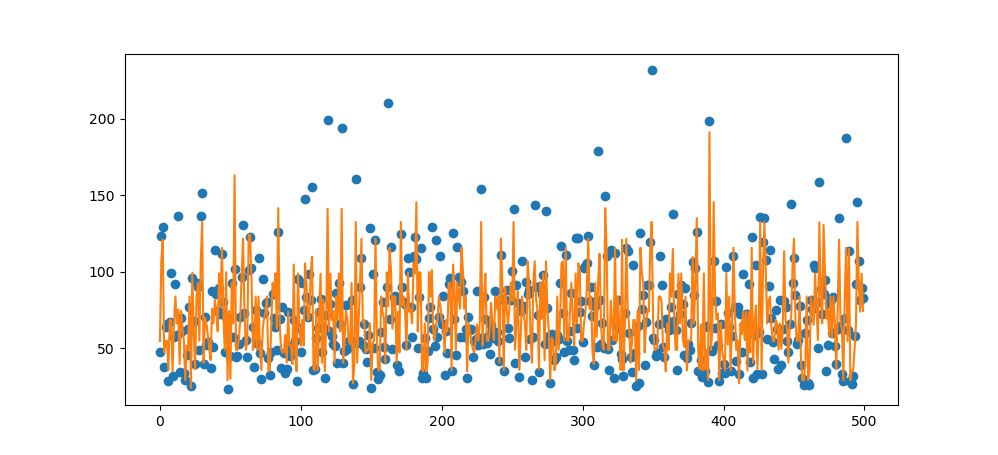

In [71]:
plt.plot(y_test.values[:500], 'o')
plt.plot(preds[:500])
plt.show()

In [72]:
pipeline.score(X_test, y_test)

0.65066559546866154

In [73]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'standar', 'regressor', 'standar__copy', 'standar__with_mean', 'standar__with_std', 'regressor__criterion', 'regressor__max_depth', 'regressor__max_features', 'regressor__max_leaf_nodes', 'regressor__min_impurity_decrease', 'regressor__min_impurity_split', 'regressor__min_samples_leaf', 'regressor__min_samples_split', 'regressor__min_weight_fraction_leaf', 'regressor__presort', 'regressor__random_state', 'regressor__splitter'])

In [82]:
from sklearn.model_selection import GridSearchCV

hyperparameters = { 'regressor__max_depth': range(3,16)}

rgs = GridSearchCV(pipeline, hyperparameters, cv=5)

rgs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regressor', DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'regressor__max_depth': range(3, 16)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [83]:
rgs.best_params_

{'regressor__max_depth': 7}

In [84]:
rgs.refit

True

In [85]:
preds = rgs.predict(X_test)
rgs.score(X_test, y_test)

0.64090128726798734

<IPython.core.display.Javascript object>


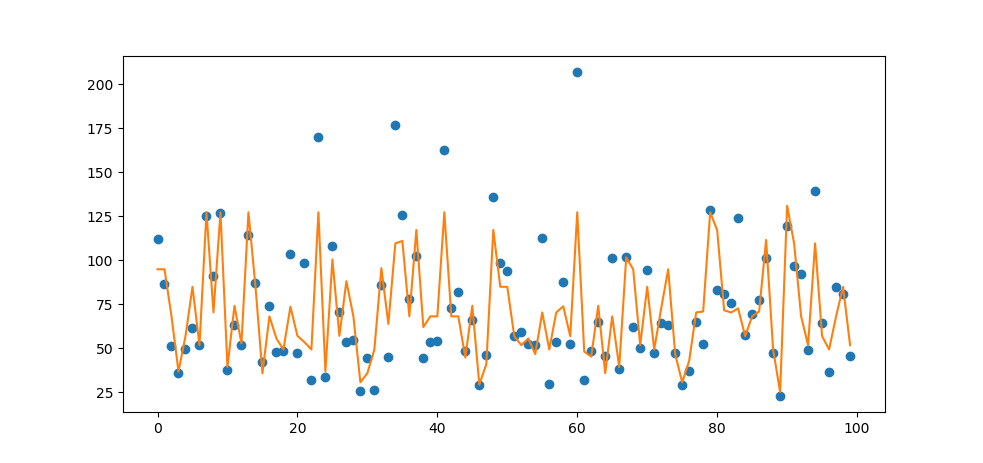

In [87]:
plt.plot(y_test.values[654:754], 'o')
plt.plot(preds[654:754])
plt.show()

In [90]:
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline(
    [
        ('standar', StandardScaler()),
        ('regressor', RandomForestRegressor(max_depth = 8, random_state = 1, n_estimators=100))
    ])

pipeline.fit(X_train, y_train)
preds = pipeline.predict(X_test)

<IPython.core.display.Javascript object>


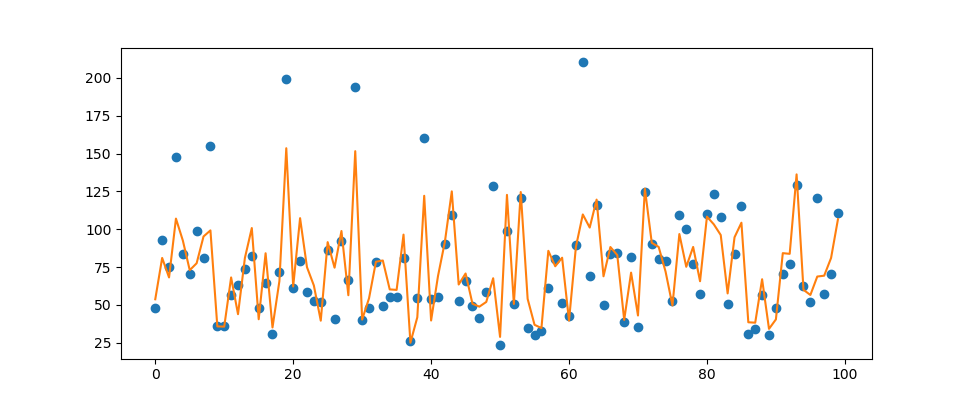

In [94]:
plt.plot(y_test.values[100:200], 'o')
plt.plot(preds[100:200])
plt.show()

In [93]:
pipeline.score(X_test, y_test)

0.71566017539378823

In [95]:
scalerY = StandardScaler().fit(y_train.values.reshape(-1, 1))
scalerX = StandardScaler().fit(X_train)

In [98]:
X_train_sc = scalerX.transform(X_train)
y_trian_sc = scalerY.transform(y_train.values.reshape(-1, 1))

In [102]:
pipeline.fit(X_train_sc, y_trian_sc)
preds = scalerY.inverse_transform(pipeline.predict(scalerX.transform(X_test)))

/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


<IPython.core.display.Javascript object>


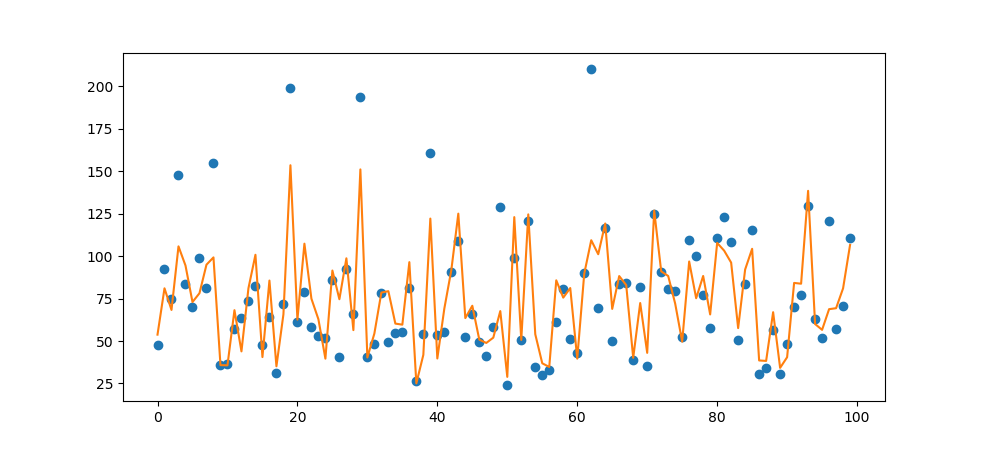

In [103]:
plt.plot(y_test.values[100:200], 'o')
plt.plot(preds[100:200])
plt.show()

In [105]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'standar', 'regressor', 'standar__copy', 'standar__with_mean', 'standar__with_std', 'regressor__bootstrap', 'regressor__criterion', 'regressor__max_depth', 'regressor__max_features', 'regressor__max_leaf_nodes', 'regressor__min_impurity_decrease', 'regressor__min_impurity_split', 'regressor__min_samples_leaf', 'regressor__min_samples_split', 'regressor__min_weight_fraction_leaf', 'regressor__n_estimators', 'regressor__n_jobs', 'regressor__oob_score', 'regressor__random_state', 'regressor__verbose', 'regressor__warm_start'])

In [107]:
hyperparameters = { 'regressor__max_depth': range(3,16),
                    'regressor__n_estimators': [100, 150, 200]}

rfr = GridSearchCV(pipeline, hyperparameters, cv=5)

rfr.fit(X_train_sc, y_trian_sc)

/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity...stimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'regressor__max_depth': range(3, 16), 'regressor__n_estimators': [100, 150, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [108]:
rfr.best_params_

{'regressor__max_depth': 15, 'regressor__n_estimators': 200}

In [109]:
rfr.refit

True

In [113]:
preds = scalerY.inverse_transform(pipeline.predict(scalerX.transform(X_test)))
rgs.score(X_test, y_test)

0.64090128726798734

In [114]:
preds

array([  62.38489629,  111.52496183,  123.75492422, ...,   75.45732072,
         68.63460772,   56.10984045])

<IPython.core.display.Javascript object>


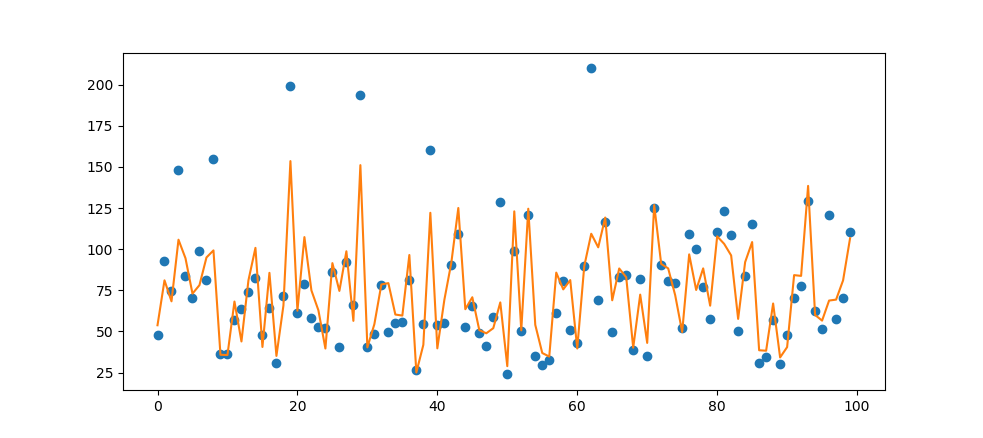

In [115]:
plt.plot(y_test.values[100:200], 'o')
plt.plot(preds[100:200])
plt.show()